# Importing Libraries and Modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading, Cleaning, and Inspection

In [2]:
data=pd.read_csv('national-anthems.csv',encoding='utf-8')
data.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [3]:
data["Continent"].value_counts()

Continent
Africa           56
Europe           44
Asia             44
North_America    24
South_America    12
Oceania          10
Name: count, dtype: int64

In [4]:
data.columns=map(str.lower,data.columns)
data.head()

,country,alpha-2,alpha-3,continent,anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    190 non-null    object
 1   alpha-2    189 non-null    object
 2   alpha-3    190 non-null    object
 3   continent  190 non-null    object
 4   anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [6]:
data[data['alpha-2'].isna()]

,country,alpha-2,alpha-3,continent,anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


In [7]:
data[data['country'] == 'Namibia']

,country,alpha-2,alpha-3,continent,anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


In [8]:
data.loc[168, 'alpha-2'] = "NA"

In [9]:
print(data[data['alpha-2'].isna()])

Empty DataFrame
Columns: [country, alpha-2, alpha-3, continent, anthem]
Index: []


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    190 non-null    object
 1   alpha-2    190 non-null    object
 2   alpha-3    190 non-null    object
 3   continent  190 non-null    object
 4   anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


# Corpus Processing

In [11]:
corpus_before=data['anthem'].tolist() # making a list of all anthems of 190 countries
len(corpus_before)

190

In [12]:

print(corpus_before[97][0:]) #india's national anthem in english 
print("-------------------")
print(corpus_before[18][0:447])
print("-------------------")
print(corpus_before[52][0:447])

Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee
-------------------
O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂrpÃƒÂ¡d our hero's 
-------------------
We are free! May we always 

In [13]:
import re
import nltk.corpus 
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer

Removes a list of words (ie. stopwords) from a tokenized list.

In [14]:
def remove_words(list_of_tokens, list_of_words):
    return [token for token in list_of_tokens if token not in list_of_words]

Applies stemming to a list of tokenized words

In [15]:
def apply_stemming(list_of_tokens, stemmer):
    return [stemmer.stem(token) for token in list_of_tokens]


Removes any words composed of less than 2 or more than 21 letters

In [16]:
def two_or_more_than_21_letters(list_of_tokens):
    two_or_22_letter_word = []
    for token in list_of_tokens:
        if len(token) <= 2 or len(token) >= 21:
            two_or_22_letter_word.append(token)
    return two_or_22_letter_word

In [17]:
def prepare_corpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open('countries.txt')]
    nationalities_list = [line.rstrip('\n') for line in open('nationalities.txt')] 
    other_words = [line.rstrip('\n') for line in open('stopwords_scrapmaker.txt')]
    
    for single_country in corpus:
        index = corpus.index(single_country)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www    

        list_of_tokens = word_tokenize(corpus[index])
        two_or_22_letter_word = two_or_more_than_21_letters(list_of_tokens)

        list_of_tokens = remove_words(list_of_tokens, stopwords)
        list_of_tokens = remove_words(list_of_tokens, two_or_22_letter_word)
        list_of_tokens = remove_words(list_of_tokens, countries_list)
        list_of_tokens = remove_words(list_of_tokens, nationalities_list)
        list_of_tokens = remove_words(list_of_tokens, other_words)
        
        list_of_tokens = apply_stemming(list_of_tokens, param_stemmer)
        list_of_tokens = remove_words(list_of_tokens, other_words)

        corpus[index]   = " ".join(list_of_tokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [18]:
language = 'english'
corpus = prepare_corpus(corpus_before.copy(), language)

print(corpus_before[18][0:460]) 
print("==================")
print(corpus[18][0:460]) 

print(corpus_before[97][0:])
print("==================")
print(corpus[97][0:]) 

O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂrpÃƒÂ¡d our hero's descendants W
lord bless nation grace bounti extend guard arm strife enemi long torn ill fate bring time relief nation suffer sin past futur brought ancestor carpathian holi peak beauti homeland bendeguz son flow river tisza danub afarpafa!d hero descend root bloom plain kun ripen wheat grape field tokaj drip sweet nectar flag plant wild turk earthwork mafa!tyafa! grave armi whimper vienna proud fort sin anger gather bosom struck lightn thunder cloud plunder mongol arro
Thou art the ruler of the minds of all people, Dispenser of India's destiny. T

#  TF-IDF Vectorization / Statistical Weighting of Words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)## assign score to each word in each list
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows and {} columns".format(final_df.shape[0],final_df.shape[1]))
print("{} ".format(final_df.shape))

final_df.T.nlargest(7, 0)

190 rows and 2543 columns
(190, 2543) 


,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
sacr,0.314285,0.000000,0.000000,0.000000,0.095563,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
fatherland,0.254830,0.130993,0.077471,0.207215,0.000000,0.083289,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
proclaim,0.246156,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.117607
flag,0.220666,0.113431,0.000000,0.059811,0.067097,0.000000,0.0,0.000000,0.0,0.0,...,0.098082,0.0,0.0,0.0,0.0,0.07072,0.0,0.0,0.067492,0.070286
earth,0.202957,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.218313,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
man,0.194247,0.149776,0.000000,0.000000,0.000000,0.000000,0.0,0.104472,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
honour,0.186606,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000


# K-Means
Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result

In [20]:
from sklearn import cluster
def run_KMeans(max_k, data): 
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k): 
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'lloyd')

        kmeans_results.update( {k : kmeans.fit(data)} ) 

    return kmeans_results

# Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [21]:
import matplotlib.cm as cm 
from sklearn.metrics import silhouette_samples,silhouette_score
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) 
        avg_dict.update( {silhouette_avg : n_clusters} ) # Average Score for all Samples
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)
    return avg_dict

In [22]:
k = 10
kmeans_results = run_KMeans(k, final_df)
print(kmeans_results)

{2: KMeans(n_clusters=2, n_init=10, random_state=1), 3: KMeans(n_clusters=3, n_init=10, random_state=1), 4: KMeans(n_clusters=4, n_init=10, random_state=1), 5: KMeans(n_clusters=5, n_init=10, random_state=1), 6: KMeans(n_clusters=6, n_init=10, random_state=1), 7: KMeans(n_clusters=7, n_init=10, random_state=1), 8: KMeans(n_init=10, random_state=1), 9: KMeans(n_clusters=9, n_init=10, random_state=1), 10: KMeans(n_clusters=10, n_init=10, random_state=1)}


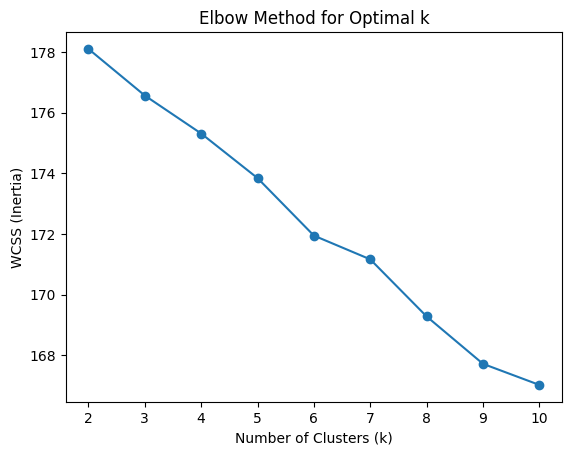

In [23]:
wcss = [kmeans_results[k].inertia_ for k in kmeans_results]
plt.plot(list(kmeans_results.keys()), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


# Cluster Analysis
Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [24]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats],palette="rainbow",hue="features", legend=False)
        plt.show()

In [25]:
best_result = 5
kmeans = kmeans_results.get(best_result)

# Model Prdecition
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
print(final_df)
prediction

      abandon  abanyarwanda  abid  ablaz    abound  absolut   abstain  abund  \
0    0.000000           0.0   0.0    0.0  0.000000      0.0  0.173231    0.0   
1    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
2    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
3    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
4    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
..        ...           ...   ...    ...       ...      ...       ...    ...   
185  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
186  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
187  0.102768           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
188  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
189  0.000000           0.0   0.0    0.0  0.153457      0.0  0.000000    0.0   

     abyss   ac  ...  yonder  yore     

array([0, 0, 0, 1, 2, 2, 0, 0, 0, 4, 0, 4, 1, 0, 1, 2, 1, 4, 1, 3, 0, 0,
       2, 0, 4, 0, 2, 0, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 0, 1, 0, 3, 1, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 4, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1,
       4, 2, 0, 3, 2, 1, 1, 3, 0, 2, 2, 0, 4, 1, 0, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 0, 2, 3, 2, 2, 2, 1, 2, 0, 1, 0, 3, 3, 2, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 2, 1,
       1, 1, 1, 1, 2, 2, 3, 1, 4, 1, 1, 2, 1, 2, 0, 0, 2, 4, 2, 2, 3, 0,
       1, 0, 4, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 4,
       2, 2, 3, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int32)

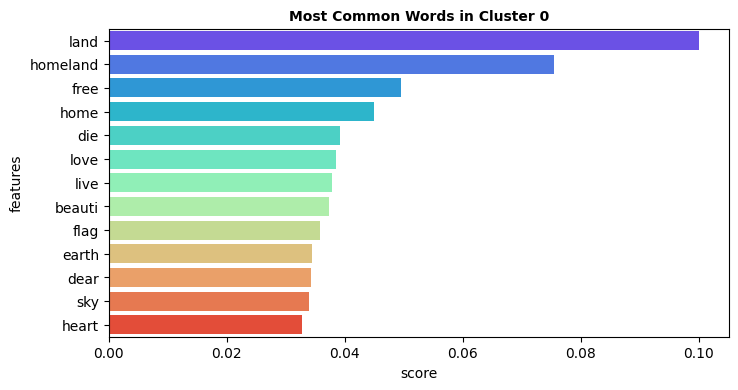

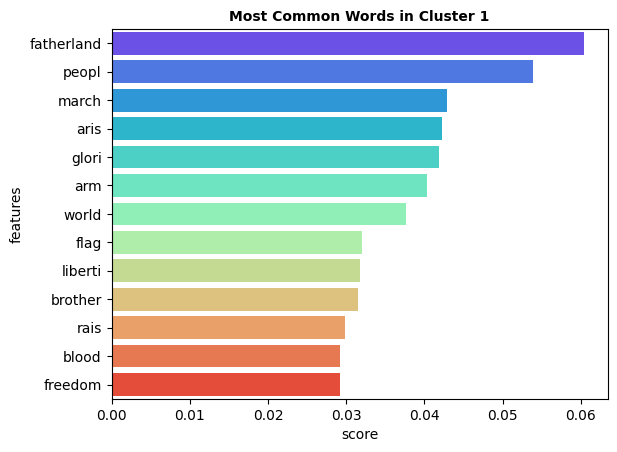

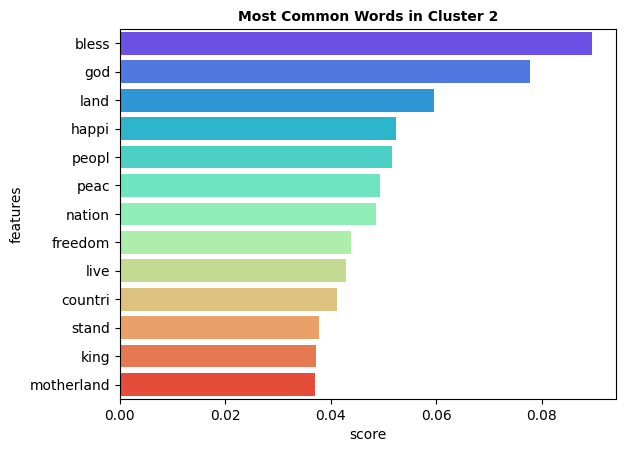

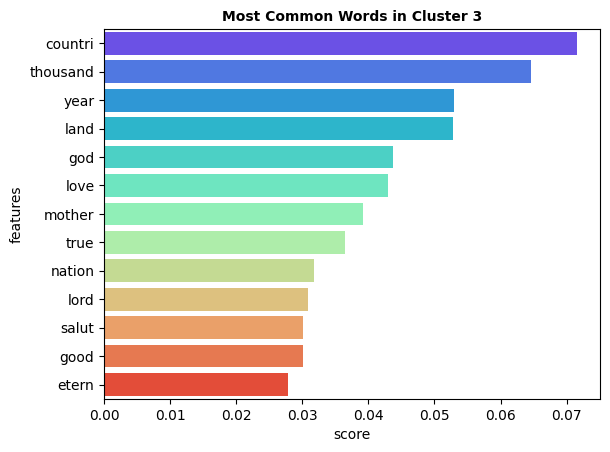

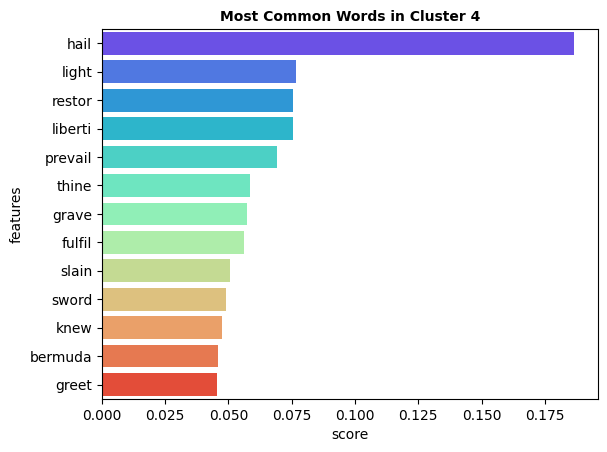

In [ ]:
n_features = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_features)
plotWords(dfs, 13)
common_words=[]
for i in dfs:
  common_words.append(list(i['features'].values)) # to store common words along with the label in final csv.

# Map of Words
Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [27]:
from wordcloud import WordCloud
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

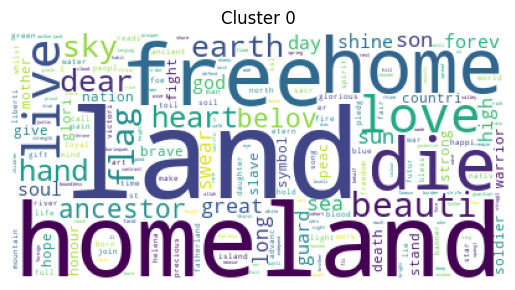

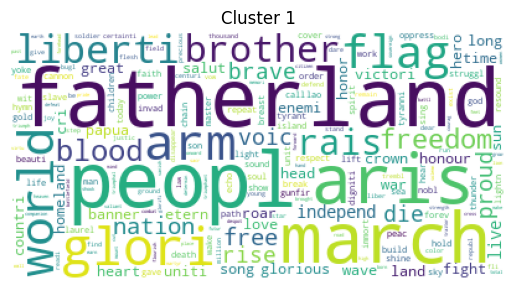

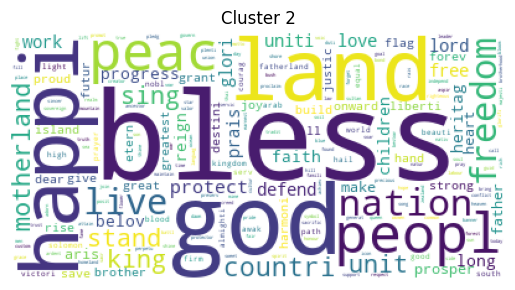

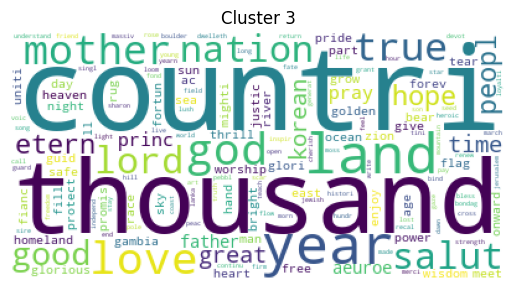

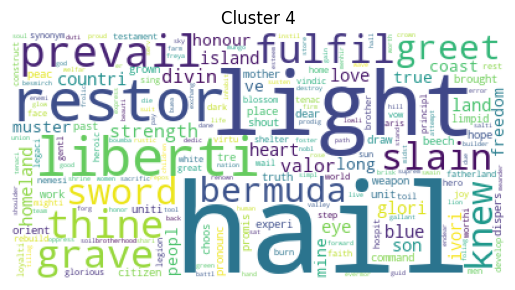

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

Preparing final groups according to the clustering  for visualization

Cluster Intution¶
Here, if can see that in the 0th cluster: The most common words are bless, God, Glori, etc. based on these words we can give the cluster name its name

0 => Praise the lord cluster

In the second cluster, we can see the most common words are Father, Freedom, nation, etc. So the name can be

1 => Fatherly Patriot Cluster

Similarly, in the third cluster, the most common words are mother, land, home, etc. So we can give it the name.

2 => Motherly Nature Cluster

As the anthems in this cluster mostly praise their nature and land and show love towards it.

Now the fourth Cluster describes mostly patriarchy so we can give the name

3 => Patriot Cluster

In the last cluster, the most common words are march, brave, gunfire, etc. So it is easy to say that it is a

4 => Mighty Military Cluster

The names are purely imaginary and do not intend to make harm anyone's feelings.

So, we have names of our clusters let's rename them and visualize them on the world map to see the results and gain better intuition.

In [29]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
data['label'] = labels
data['common_words'] = data['label'].map({0:common_words[0],1:common_words[1],2:common_words[2],3:common_words[3],4:common_words[4]})
data['label_name'] = data['label'].map({0:"Praise the lord cluster",1:" Fatherly Patriot Cluster",2:"Motherly Nature Cluster",3:"Patriot Cluster",4:" Mighty Military Cluster"})
data.to_csv("./grouped_national_anthems.csv",index=False)
data.head()

,country,alpha-2,alpha-3,continent,anthem,label,common_words,label_name
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",0,"[land, homeland, free, home, die, love, live, ...",Praise the lord cluster
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",0,"[land, homeland, free, home, die, love, live, ...",Praise the lord cluster
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",0,"[land, homeland, free, home, die, love, live, ...",Praise the lord cluster
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",1,"[fatherland, peopl, march, aris, glori, arm, w...",Fatherly Patriot Cluster
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",2,"[bless, god, land, happi, peopl, peac, nation,...",Motherly Nature Cluster


In [30]:
data['common_words'].value_counts()

common_words
[bless, god, land, happi, peopl, peac, nation, freedom, live, countri, stand, king, motherland, sing, unit, protect, uniti, love, free, work]        62
[fatherland, peopl, march, aris, glori, arm, world, flag, liberti, brother, rais, blood, freedom, nation, free, proud, die, brave, rise, voic]       49
[land, homeland, free, home, die, love, live, beauti, flag, earth, dear, sky, heart, hand, ancestor, belov, great, sun, sea, son]                    44
[countri, thousand, year, land, god, love, mother, true, nation, lord, salut, good, etern, peopl, hope, great, time, korean, princ, pray]            23
[hail, light, restor, liberti, prevail, thine, grave, fulfil, slain, sword, knew, bermuda, greet, strength, divin, valor, son, heart, eye, ivori]    12
Name: count, dtype: int64

# Visualization the Clustered Countries in a Map
Now that we have our final grouping it would be really cool to visualize it in a interactive map. To do this we'll use the awesome Folium library to see our interactive map!

We'll load a geojson file of polygons and country codes with geopandas and merge it with the labelled dataframe from the cell above.

In [31]:
import json
import geopandas as gpd

# Loading countries polygons
geo_path = 'world-countries.json'
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the alpha-3 country codes
merge = pd.merge(gpf, data, left_on='id', right_on='alpha-3')
data_to_plot = merge[["id", "name", "label","label_name", "geometry"]]

data_to_plot.head(5)

,id,name,label,label_name,geometry
0,AFG,Afghanistan,0,Praise the lord cluster,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,1,Fatherly Patriot Cluster,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,0,Praise the lord cluster,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,ARE,United Arab Emirates,2,Motherly Nature Cluster,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,1,Fatherly Patriot Cluster,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."


In [32]:
import branca.colormap as cm

# Creating a discrete color map
values = data_to_plot[['label']].to_numpy()
color_step = cm.StepColormap(['r', 'y','g','b', 'm'], vmin=values.min(), vmax=values.max(), caption='step')

color_step

# Painting the Groups into a Choropleth Map
Now that we have all the information that we want to plot into a Dataframe, we'll create a function that makes a Choropleth Map to be displayed on a folium map.

In [33]:
import folium
from branca.element import Figure

def make_geojson_choropleth(display, data, colors):
    '''creates geojson choropleth map using a colormap, with tooltip for country names and groups'''
    group_dict = data.set_index('id')['label'] # Dictionary of Countries IDs and Clusters
    tooltip = folium.features.GeoJsonTooltip(["name", "label_name"], aliases=display, labels=True)
    return folium.GeoJson(data[["id", "name","label_name","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['id']]),
                               #'fillColor': test(feature),
                               'color':'black',
                               'weight':0.5
                               },
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Makes map appear inline on notebook
def display(m, width, height):
    """Takes a folium instance and embed HTML."""
    fig = Figure(width=width, height=height)
    fig.add_child(m)
    #return fig

In [34]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Group:"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1300, 675
display(m, width, height)
m

In [35]:
data["country"].values

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Moldova (the Republic of)', 'Montenegro',
       'Netherlands (the)', 'Norway', 'Poland', 'Portugal',
       'Republic of North Macedonia', 'Romania',
       'Russian Federation (the)', 'Serbia', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela',
       'United States of America', 'Canada', 'Mexico', 'Guatemala',
       'Cuba', 'Haiti', 'Dominican Republic', 'Honduras', 'El Salvador',
       'Ni

In [36]:
# Search country name from above list
country1 = "India"  
country2 = "Sri Lanka" 
anthem1 = data[data["country"]==country1]["anthem"].values
anthem2 = data[data["country"]==country2]["anthem"].values

print(anthem1)
print("=========")
print(anthem2)
print("=========")
print("common words: ")
print("=========")
print(data[data["country"]==country1]["common_words"].values[0])
print("=========")
print(data[data["country"]==country2]["common_words"].values[0])

["Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee"]
['Thou Mother Lanka, Oh Mother Lanka we salute, salute, salute, salute Thee! Plenteous in prosperity, Thou, Beauteous in grace and love, Laden with grain and luscious fruit, And fragrant flowers of radiant hue, Giver of life and all good things, Our land of joy and victory, Receive our grateful praise sublime, we worship, worship Thee. Oh Mother Lanka! We salute, salute, salute, salute Thee! Thou gavest us Knowledge and Truth, Thou art our strength and inward faith, Our light divine and sentient being, Bre